## <font size="15"><b>Ed Edd ed Eddie Group - Data Science Project</b></font>


---

The following documentation is intended to outline and explain the core content, technical approach, implementation aspects, and development issues regarding the final project for the second module of "Computational Management of Data" course - namely "Data Science" - held within the "Digital Humanities and Digital Knowledge" Master's Degree at Alma Mater Studiorum - University of Bologna. The project has been developed by: Luca Scotti, Eliza Stuglik and Mariachiara Giorgi. 

The main purpose is to develop an information system by mean of a set of software technologies. The general idea, specified within the guidelines provided by the lecturer, can be considered as the integration of three different - although cumulative - steps: <br>
1) Uploading and processing data stored  in two distinct data format, namely Comma Separated Value (CSV) and Java Script Object Notation (JSON). <br>
2) Generate and populate databases in accordance with two different DBMS data model - relational and graph. <br>
3) Define a set of formal instructions able to query and retrieve the information embedded into the databases. <br>

The whole process has to be managed by a Python environment.

## <font size="5"><b>Data Analysis</b></font>
The first thing to do before starting to process data is a preparatory step: the quantitative analysis of data. The goal of such stage is on the one hand, to get a general overview about how the data are organized in respect to the data format through which they are stored; on the other, to understand what kind of information they contain such as their data structure and semantic characterization. Some of the built-in methods described and implemented in this section belong to the *Pandas* library, some others to *matplotlib*.


The input files where the data are stored are divided in two groups. Each of them contains both a CSV and a JSON file. The first group includes "relational_publication.csv" and "relation_other_data.json", whereas
the second one includes "graph.publications.csv" and "graph_other_data.json".

 
## <font size="5">Relational_publication.csv:</font>
This file contains a dataset including a bunch of typical metadata about some academic publications. Being the CSV data format a tabular one, its content is ordered by mean of the intersection between rows and columns.
We proceed to read it using the "read_csv()" method and passing the data frame produced as output to the **info()** method, in order to get general information about the file content. We are going to fulfill this first step calling the **read_csv()** method twice. Primarily, calling it with the **keep_default_na** parameter set to **False**, then leaving it with the default mode (i.e. **True**).
Throught the first call, since every empty cell is filled with an empty string, we obtain a regular dimentional perception of the table structure (i.e. the maximum amount of available rows). The second allows us to exclude all the **Null** values, so that comparing the former output with the latter we will be able to have a precise idea about the presence of *Null Objects*.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# first call
from pandas import read_csv
publicationDF_CSV = read_csv("/content/drive/MyDrive/unibo/DHDK_magistrale/courses/DataScience/FinalProject/GitRep/datascience/relational_db/relational_publication.csv", keep_default_na=False)
print("publicationDF_CSV_info:\n")
print(publicationDF_CSV.info())

publicationDF_CSV_info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 500 non-null    object
 1   title              500 non-null    object
 2   type               500 non-null    object
 3   publication_year   500 non-null    int64 
 4   issue              500 non-null    object
 5   volume             500 non-null    object
 6   chapter            500 non-null    object
 7   publication_venue  500 non-null    object
 8   venue_type         500 non-null    object
 9   publisher          500 non-null    object
 10  event              500 non-null    object
dtypes: int64(1), object(10)
memory usage: 43.1+ KB
None


In [ ]:
# second call
publicationDF_CSV = read_csv("/content/drive/MyDrive/unibo/DHDK_magistrale/courses/DataScience/FinalProject/GitRep/datascience/relational_db/relational_publication.csv")
print("publicationDF_CSV_info:\n")
print(publicationDF_CSV.info())

publicationDF_CSV_info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    object 
 1   title              500 non-null    object 
 2   type               500 non-null    object 
 3   publication_year   500 non-null    int64  
 4   issue              347 non-null    object 
 5   volume             443 non-null    object 
 6   chapter            22 non-null     float64
 7   publication_venue  498 non-null    object 
 8   venue_type         498 non-null    object 
 9   publisher          498 non-null    object 
 10  event              0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB
None


As we can see, we have eleven column for five hundred rows. Most of the values are **String** objects. There are some columns containing some Null values (i.e. **issue**, **volume**, **chapter**, **publication_venue**, **venue_type**, and **publisher**) and one consisting of Null value only (i.e. **event**).


Than we pass the PublicationDF variable to the **describe()** method with the **include** parameter set to **all** to get additional details. 

In [ ]:
print("publicationDF_CSV_describe:\n")
publicationDF_CSV.describe(include="all")

publicationDF_CSV_describe:



,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,347,443,22.000000,498,498,498,0.0
unique,500,500,2,NaN,31,149,NaN,295,2,32,NaN
top,doi:10.1162/qss_a_00023,"Opencitations, An Infrastructure Organization ...",journal-article,NaN,1,11,NaN,Scientometrics,journal,crossref:297,NaN
freq,1,1,478,NaN,69,29,NaN,50,478,145,NaN
mean,NaN,NaN,NaN,2019.558000,NaN,NaN,0.909091,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.512353,NaN,NaN,0.294245,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2014.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


From that last output we can derive some other relevant informations:
- All the publications are published between 2014 and 2021.
- Most of the publication are published during 2021.
- The most common *type* is *journal-article*.
- The most common *publication_venue* is *Scientometrics*.


Within the table below we provide a synthesis from the last two outputs:

   | | column_name  | data_type  |  non-null count| unique| 
|---:|:-------------|:-----------|:------|:------|
| 1 | id            | String    | 500   | 500     |     
| 2 | title         | String    | 500   | 500     |
| 3 | type          | String    | 500   | 2     |     
| 4 | publication_year| int64    |500.000000| Nan     |     
| 5 | issue         | String    | 347   | 31     |     
| 6 | volume        | String    | 443   | 149     |     
| 7 | chapter       | float64    | 22.000000| Nan     |     
| 8 | publication_venue| String    | 498   | 295     |     
| 9 | venue_type    | String    | 498   | 2     |     
| 10 | publisher     | String    | 498   | 32     |     
| 11| event         | float64    | 0.0   | Nan     |     



For what concerns some specific numeric attributes, it could be useful to produce some basic statistical observations.
To do so one may use classic statistical tools calling functions as **mode()** and **median()** -- the means are already provided by the **describe()** method.
For instance, we could apply the former to *publisher* values and the latter  to *publication_year* values as follows:

In [ ]:
publisher_mode = publicationDF_CSV["publisher"].mode()
print()
print("The mode for publisher values is: " + str(publisher_mode))
publication_year_median = publicationDF_CSV["publication_year"].median()
print("The median for publication_year values is: " + str(publication_year_median))


The mode for publisher values is: 0    crossref:297
dtype: object
The median for publication_year values is: 2020.0


Using the **query()** method, the user is able to retrieve outputs according to specific parameters used as information filters.
For instance, one may want to obtain q1) all the publications having *journal_article* as *type* and *Scientometrics* as *publication_venue*.
Similiarly, q2) all the publication having a specific *publisher*.
Or again, one may be intrested in getting q3) the publications sharing a specific *publication_year* or q4) within a wider time range.

Let's see how to print those informations.

In [ ]:
q1 = publicationDF_CSV.query('type == "journal-article"' and 'publication_venue == "Scientometrics"')
print(q1)

                                 id  \
1    doi:10.1007/s11192-019-03217-6   
2    doi:10.1007/s11192-019-03311-9   
6    doi:10.1007/s11192-020-03397-6   
12   doi:10.1007/s11192-020-03690-4   
16   doi:10.1007/s11192-021-04079-7   
19   doi:10.1007/s11192-021-04097-5   
41    doi:10.1007/s11192-016-1879-4   
42    doi:10.1007/s11192-016-1971-9   
43    doi:10.1007/s11192-016-2071-6   
44    doi:10.1007/s11192-016-2132-x   
45    doi:10.1007/s11192-016-2194-9   
46    doi:10.1007/s11192-016-2215-8   
47    doi:10.1007/s11192-017-2436-5   
48    doi:10.1007/s11192-017-2449-0   
49    doi:10.1007/s11192-017-2452-5   
50    doi:10.1007/s11192-017-2481-0   
51    doi:10.1007/s11192-017-2538-0   
52    doi:10.1007/s11192-017-2604-7   
53    doi:10.1007/s11192-017-2616-3   
54    doi:10.1007/s11192-017-2636-z   
55    doi:10.1007/s11192-018-2651-8   
56    doi:10.1007/s11192-018-2705-y   
57    doi:10.1007/s11192-018-2734-6   
58    doi:10.1007/s11192-018-2740-8   
59    doi:10.1007/s11192-

In [ ]:
q2 = publicationDF_CSV.query('publisher == "crossref:297"')
print(q2)

                                 id  \
1    doi:10.1007/s11192-019-03217-6   
2    doi:10.1007/s11192-019-03311-9   
3         doi:10.1038/sdata.2016.18   
6    doi:10.1007/s11192-020-03397-6   
7    doi:10.1186/s13321-020-00448-1   
..                              ...   
487  doi:10.1007/s40200-020-00606-0   
488  doi:10.1007/s00521-020-05395-4   
489  doi:10.1007/s11695-020-05058-2   
496  doi:10.1186/s12888-020-02825-4   
498  doi:10.1007/s11301-020-00196-4   

                                                 title             type  \
1    Software Review: Coci, The Opencitations Index...  journal-article   
2    Nine Million Book Items And Eleven Million Cit...  journal-article   
3    The Fair Guiding Principles For Scientific Dat...  journal-article   
6    The Practice Of Self-Citations: A Longitudinal...  journal-article   
7    Adoption Of The Citation Typing Ontology By Th...  journal-article   
..                                                 ...              ...   
487  C

In [ ]:
q3 = publicationDF_CSV.query('publication_year == 2019')
print(q3)

                                    id  \
1       doi:10.1007/s11192-019-03217-6   
2       doi:10.1007/s11192-019-03311-9   
4     doi:10.1371/journal.pbio.3000385   
5                doi:10.3233/ds-190016   
26    doi:10.1007/978-3-030-16187-3_20   
..                                 ...   
351  doi:10.1080/10963758.2019.1655433   
352  doi:10.1080/00131911.2019.1566212   
354         doi:10.3390/ijerph16111928   
355         doi:10.3390/ijerph16152788   
361   doi:10.1021/acs.analchem.9b05454   

                                                 title             type  \
1    Software Review: Coci, The Opencitations Index...  journal-article   
2    Nine Million Book Items And Eleven Million Cit...  journal-article   
4    The Nih Open Citation Collection: A Public Acc...  journal-article   
5    Enabling Text Search On Sparql Endpoints Throu...  journal-article   
26   Using The Spar Ontology Network To Represent T...     book-chapter   
..                                           

In [ ]:
q4 = publicationDF_CSV.query('publication_year >= 2015 and publication_year <= 2017')
print(q4)

                                     id  \
3             doi:10.1038/sdata.2016.18   
41        doi:10.1007/s11192-016-1879-4   
42        doi:10.1007/s11192-016-1971-9   
43        doi:10.1007/s11192-016-2071-6   
44        doi:10.1007/s11192-016-2132-x   
45        doi:10.1007/s11192-016-2194-9   
46        doi:10.1007/s11192-016-2215-8   
47        doi:10.1007/s11192-017-2436-5   
48        doi:10.1007/s11192-017-2449-0   
49        doi:10.1007/s11192-017-2452-5   
50        doi:10.1007/s11192-017-2481-0   
51        doi:10.1007/s11192-017-2538-0   
52        doi:10.1007/s11192-017-2604-7   
53        doi:10.1007/s11192-017-2616-3   
80    doi:10.1080/13683500.2017.1408574   
83        doi:10.1007/s10843-017-0213-4   
85                doi:10.1002/leap.1114   
86    doi:10.1080/23299460.2017.1387509   
92        doi:10.1007/s11135-017-0522-7   
122    doi:10.1371/journal.pone.0170296   
124               doi:10.1002/asi.23630   
125               doi:10.1002/asi.23770   
129        

Other useful methods to discover and numerically visualize data properties are **value_counts()** and **unique()**. 
The first one returns the number of rows sharing the same instance within a series; the second a *NumPy* array containing the unique values.

Thus let's consider the case in which one needs to get an overview of the *publication_venue* (at least the most frequents) and *type* instances distribution: 

In [ ]:
publication_venue_count = publicationDF_CSV["publication_venue"].value_counts()[:10]
print("publication_venue_count:\n")
print(str(publication_venue_count) + "\n")
type_count = publicationDF_CSV["type"].value_counts()
print("type_count:\n")
print(type_count)

publication_venue_count:

Scientometrics                                                       50
Sustainability                                                       30
International Journal Of Environmental Research And Public Health    14
Journal Of Informetrics                                               9
Journal Of Cleaner Production                                         9
The Canadian Journal Of Chemical Engineering                          8
Energies                                                              8
Technological Forecasting And Social Change                           6
Journal Of The Association For Information Science And Technology     6
Plos One                                                              5
Name: publication_venue, dtype: int64

type_count:

journal-article    478
book-chapter        22
Name: type, dtype: int64


Another example could be a situation in which one needs to manage issues concerning unique instances referring to some attributes, as for example within the columns *issue*, *type* and *publication_venue*:

In [ ]:
issue_unique = publicationDF_CSV["issue"].unique()
print("issue_unique:\n")
print(str(issue_unique) + "\n")
type_unique = publicationDF_CSV["type"].unique()
print("type_unique:\n")
print(str(type_unique) + "\n")
publisher_unique = publicationDF_CSV["publisher"].unique()
print("publisher_unique:\n")
print(str(publisher_unique) + "\n")


issue_unique:

['1' '2' '10' '1-2' '' '9' '799' '3' '21' '7' '4' '23' '16' '6' '12' '5'
 '11' '13' '15' '17' '9-10' '20' '18' '8' '22' '14' '76' '96' '9-12' '95'
 '32' 'ahead-of-print']

type_unique:

['journal-article' 'book-chapter']

publisher_unique:

['crossref:281' 'crossref:297' 'crossref:340' 'crossref:7437'
 'crossref:4443' 'crossref:2373' 'crossref:301' 'crossref:1968'
 'crossref:1709' 'crossref:56' 'crossref:311' 'crossref:2258'
 'crossref:78' 'crossref:16117' 'crossref:179' 'crossref:292'
 'crossref:140' 'crossref:266' 'crossref:4297' 'crossref:6228'
 'crossref:98' 'crossref:1010' 'crossref:530' '' 'crossref:9677'
 'crossref:286' 'crossref:2560' 'crossref:30' 'crossref:316'
 'crossref:239' 'crossref:7132' 'crossref:6188' 'crossref:2209']



A way to graphically visualize the outputs of the **value_count()** method, is to produce the correspondents plots using *matplotlib* methods.
Depending on the nature of data (e.g. the semantic and data-type characterization), it is possible to choose certain graphs in spite of others.<br> In our situation, except for the case of *publication_year*, which may be easily treated as a ratio-scale variable, the other attributes should be considered as nominal-scale variables. <br> Therefore we adopted bar-chart solutions for the formers and a line-graph one for the latter.



publication_venue_plot:

<class 'matplotlib.axes._subplots.AxesSubplot'>


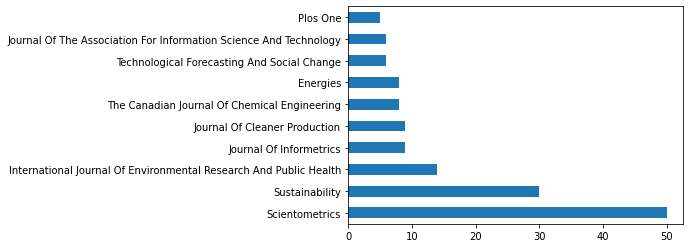

In [ ]:
publication_venue_plot = publication_venue_count.plot(kind = "barh")
print("publication_venue_plot:\n")
print(type(publication_venue_plot))

type_plot:

<class 'matplotlib.axes._subplots.AxesSubplot'>


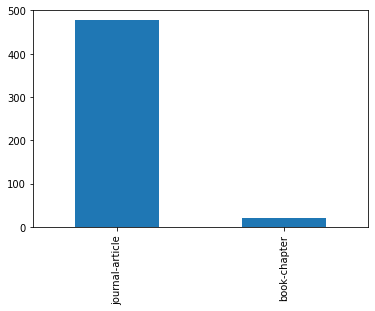

In [ ]:
type_plot = type_count.plot(kind = "bar")
print("type_plot:\n")
print(type(type_plot))

We may want a rendering of the same kind in case of time series, as that of *publication_year* column. 
In such a circumstance, the steps to follow are:<br><br>
1) Generate the series containing *publication_year* frequency rate values, using the **value_count()** method:


In [ ]:
publication_year_count = publicationDF_CSV["publication_year"].value_counts()
print("publication_year_count:\n")
print(publication_year_count) 

publication_year_count:

2021    209
2019    109
2018     83
2020     56
2017     24
2016     15
2014      3
2015      1
Name: publication_year, dtype: int64


2) Sort in descending order the index of the series of the previous output passing it to **sort_index()** method:

In [ ]:
publication_year_count_sorted = publication_year_count.sort_index()
print("publication_year_count_sorted:\n")
print(publication_year_count_sorted) 

publication_year_count_sorted:

2014      3
2015      1
2016     15
2017     24
2018     83
2019    109
2020     56
2021    209
Name: publication_year, dtype: int64


3) Draw a line diagram with the default **plot()** method:

publication_year_plot:

<class 'matplotlib.axes._subplots.AxesSubplot'>


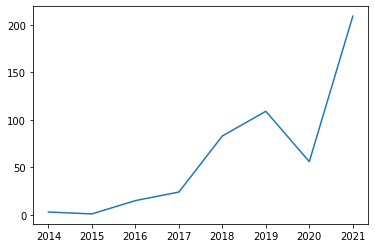

In [ ]:
publication_year_plot = publication_year_count_sorted.plot()
print("publication_year_plot:\n")
print(type(publication_year_plot))

## <font size="5">Relational_publication.json:</font>



The second dataset is stored in a JSON file. JSON is a data format (i.e.a set of rules defining how to represent data in plain text form) which derives its notation from a subset of JavaScript syntax for managing literal objects.
Data within it are organized by mean of key-value pair structures (e.g. exactly as for the case of *Map* object in Java and C++, or *Dictionary* in Python). <br> This dataset contains additional metadata about the same publication entities considered into the CSV file.<br> In spite of the CSV case, the **load()** used to access the JSON file does not returns a **reader** object. It returns instead a Python representation of JSON data format in the shape of a list of Python nested **dictionaries**. 
 

In [ ]:
from pandas.core.frame import DataFrame
from json import load

with open("/content/drive/MyDrive/unibo/DHDK_magistrale/courses/DataScience/FinalProject/GitRep/datascience/relational_db/relational_other_data.json", "r", encoding="utf-8") as jsn:
    publicationDF_JSON = load(jsn)
    print("publicationDF_JSON:\n")
    print(publicationDF_JSON)
    
  

publicationDF_JSON:

{'authors': {'doi:10.1162/qss_a_00023': [{'family': 'Peroni', 'given': 'Silvio', 'orcid': '0000-0003-0530-4305'}, {'family': 'Shotton', 'given': 'David', 'orcid': '0000-0001-5506-523X'}], 'doi:10.1007/s11192-019-03217-6': [{'family': 'Heibi', 'given': 'Ivan', 'orcid': '0000-0001-5366-5194'}, {'family': 'Peroni', 'given': 'Silvio', 'orcid': '0000-0003-0530-4305'}, {'family': 'Shotton', 'given': 'David', 'orcid': '0000-0001-5506-523X'}], 'doi:10.1007/s11192-019-03311-9': [{'family': 'Zhu', 'given': 'Yongjun', 'orcid': '0000-0003-4787-5122'}], 'doi:10.1038/sdata.2016.18': [{'family': 'Wilkinson', 'given': 'Mark D.', 'orcid': '0000-0001-6960-357X'}, {'family': 'Dumontier', 'given': 'Michel', 'orcid': '0000-0003-4727-9435'}, {'family': 'Aalbersberg', 'given': 'Ijsbrand Jan', 'orcid': '0000-0002-0209-4480'}, {'family': 'Appleton', 'given': 'Gabrielle', 'orcid': '0000-0003-0179-7384'}, {'family': 'Axton', 'given': 'Myles', 'orcid': '0000-0002-8042-4131'}, {'family': 'Baak

In this situation we can observe a list of four dictionaries. The file content is organized as follows:<br>
- *AUTHORS*: linking *DOI* to *ORCIDs* codes and these to the names.
- *VENUES_ID*: linking *ISSN* or *ISBN* codes with *DOI* identifiers.
- *REFERENCES*: linking citing *DOI* with cited *DOIs*.
- *PUBLISHERS*: linking CROSSREF identifier with publisher's *NAME*

In order to draw a general statistical overview as we did for the CSV dataset, first we have to flatten each dictionary to single Pandas dataframe.
Referring to the dictionaries *VENUE_ID*, *REFERENCES* and *PUBLISHERS*, we proceeded with a one-to-one conversion as follows:

In [ ]:
from json import loads
from pandas import json_normalize

# VENUE_ID 

venues_df = publicationDF_JSON["venues_id"]
Venues_IdDF = DataFrame(venues_df.items(), columns=['doi', 'issn_isbn']).explode('issn_isbn')

print("Venues_IdDF:\n")
print(str(Venues_IdDF) + "\n")
print("Venues_IdDF_info:\n")
print(str(Venues_IdDF.info()) + "\n")
print("Venues_IdDF_describe:\n")
print(str(Venues_IdDF.describe(include="all")) + "\n")


# REFERENCE 

citesDF = publicationDF_JSON["references"]
cites_df=DataFrame(citesDF.items(),columns=['citing','cited']).explode('cited')
cites_df=json_normalize(loads(cites_df.to_json(orient="records")))
cites_df.rename(columns={"References.keys()":"citing","References.values()":"cited"}, inplace = True)
referencesDF = cites_df

print("referencesDF:\n")
print(str(referencesDF) + "\n")
print("referencesDF_info:\n")
print(str(referencesDF.info()) + "\n")
print("referencesDF_describe:\n")
print(str(referencesDF.describe(include="all")) + "\n")

# PUBLISHER 

crossref = publicationDF_JSON["publishers"]
id_and_name = crossref.values()
organization_df = DataFrame(id_and_name)
Organization_DF = organization_df 

print("publisherDF:\n")    
print(str(Organization_DF) + "\n")
print("publisherDF_info:\n")
print(str(Organization_DF.info()) + "\n")
print("publisherDF_describe:\n")
print(str(Organization_DF.describe(include="all")) + "\n")



Venues_IdDF:

                                   doi       issn_isbn
0              doi:10.1162/qss_a_00023  issn:2641-3337
1       doi:10.1007/s11192-019-03217-6  issn:0138-9130
1       doi:10.1007/s11192-019-03217-6  issn:1588-2861
2       doi:10.1007/s11192-019-03311-9  issn:0138-9130
2       doi:10.1007/s11192-019-03311-9  issn:1588-2861
..                                 ...             ...
495  doi:10.1080/00472778.2020.1776578  issn:1540-627X
496     doi:10.1007/s11301-020-00196-4  issn:2198-1620
496     doi:10.1007/s11301-020-00196-4  issn:2198-1639
497  doi:10.1080/08989621.2020.1836620  issn:0898-9621
497  doi:10.1080/08989621.2020.1836620  issn:1545-5815

[741 rows x 2 columns]

Venues_IdDF_info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   doi        741 non-null    object
 1   issn_isbn  741 non-null    object
dtypes: object(2)
memo

The AUTHOR dictionary is split in two dataframe: <br> 
- one to represent the entity PERSON, connecting ORCID idenfifier with GIVEN_NAME and FAMILY_NAME.
- another for the relation AUTHOR, linking ORCID with DOI code.<br><br>

The last dataframe printed below is the result of **merge()** method, joining PERSON and AUTHOR dataframes throught the column they have in common: ORCID.<br>
The goal here is to  display AUTHORs frequency distribution in relation to their respective publications identifiers(DOI).<br>
We adopted this approach because otherwise, on the graph representation of data (NAME_2) we would have to visually deal with DOI code instead of much more human-readeable FAMILY_NAME and GIVEN_NAME strings.


In [ ]:
# PERSON

author = publicationDF_JSON["authors"]
person_df= DataFrame(author.items(),columns=['doi','author']).explode('author')
person_df= json_normalize(loads(person_df.to_json(orient="records")))
person_df.rename(columns={"author.family":"family_name","author.given":"given_name","author.orcid":"orc_id"}, inplace = True)
person_df.drop("doi", axis =1, inplace = True)
person_DF = person_df.drop_duplicates(subset = ["orc_id"])

print("person_DF:\n")    
print(str(person_DF) + "\n")
print("person_DF_info:\n")
print(str(person_DF.info()) + "\n")
print("person_DF_describe:\n")
print(str(person_DF.describe(include="all")) + "\n")

# AUTHOR

author = publicationDF_JSON["authors"]
author_df=DataFrame(author.items(),columns=['doi','author']).explode('author')
author_df = json_normalize(loads(author_df.to_json(orient="records")))
author_df.rename(columns={"author.family":"family_name","author.given":"given_name","author.orcid":"orc_id"}, inplace = True)
author_df.drop("family_name", axis=1, inplace = True)
author_df.drop("given_name", axis =1, inplace = True)
author_DF = author_df

print("author_DF:\n")    
print(str(author_DF) + "\n")
print("author_DF_info:\n")
print(str(author_DF.info()) + "\n")
print("author_DF_describe:\n")
print(str(author_DF.describe(include="all")) + "\n")


# AUTHOR_PERSON_JOINED

author_person_joined = author_DF.merge(person_DF, left_on='orc_id', right_on='orc_id')

print("author_person_joined:\n")    
print(author_person_joined)





person_DF:

     family_name      given_name               orc_id
0         Peroni          Silvio  0000-0003-0530-4305
1        Shotton           David  0000-0001-5506-523X
2          Heibi            Ivan  0000-0001-5366-5194
5            Zhu         Yongjun  0000-0003-4787-5122
6      Wilkinson         Mark D.  0000-0001-6960-357X
...          ...             ...                  ...
1133      Amorós      J. Ernesto  0000-0001-9601-0892
1134       Simao  Lurdes Barroso  0000-0002-9703-1481
1135    Carvalho    Luísa Cagica  0000-0002-9804-7813
1136     Madeira      Maria José  0000-0003-1722-6148
1137         Ali           Imran  0000-0002-8912-5760

[1017 rows x 3 columns]

person_DF_info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 0 to 1137
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   family_name  1017 non-null   object
 1   given_name   1017 non-null   object
 2   orc_id       1017 non-

Now we proceed with some graphical representation of data in order to generate graphs, using the methods we already seen above. <br> Since all the variables here are populated with nominal-scale values, we go on using bar-charts and pie-charts.

cited_barchart:

<class 'matplotlib.axes._subplots.AxesSubplot'>


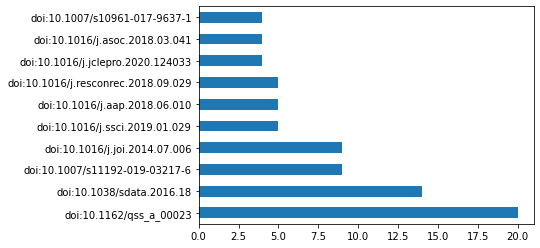

In [ ]:
# CITED_1 FROM REFERENCE


cited_plot = referencesDF["cited"].value_counts()[:10].plot(kind="barh")
print("cited_barchart:\n")
print(type(cited_plot))



cited_piechart:

<class 'matplotlib.axes._subplots.AxesSubplot'>


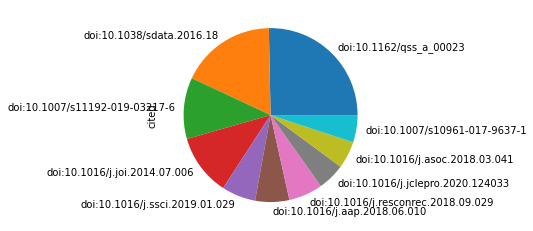

In [ ]:

# CITED_2 


cited_piechart = referencesDF["cited"].value_counts()[:10].plot(kind="pie")
print("cited_piechart:\n")
print(type(cited_piechart))



name_barchart:

<class 'matplotlib.axes._subplots.AxesSubplot'>


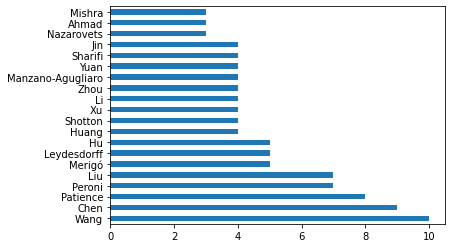

In [ ]:
# NAME FROM AUTHOR_DF


name_barchart = author_person_joined["family_name"].value_counts()[:20].plot(kind="barh")
print("name_barchart:\n")
print(type(name_barchart))

name_piechart:

<class 'matplotlib.axes._subplots.AxesSubplot'>


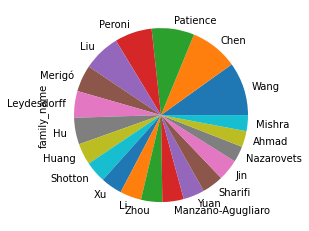

In [ ]:
# NAME_2 


name_piechart = author_person_joined["family_name"].value_counts()[:20].plot(kind="pie")
print("name_piechart:\n")
print(type(name_piechart))



The structural organization of data within the second group of file (i.e. the columns names and the semantic characterization of its rows fields), is exactly the same of its corresponding for the relational part.<br> Therefore, the analytical approach and workflow will be the same as well.

## <font size="5">Graph_publication.csv:</font>



In [ ]:
# FIRST CALL
from pandas import read_csv
GRAPH_publicationDF_CSV = read_csv("/content/drive/MyDrive/unibo/DHDK_magistrale/courses/DataScience/FinalProject/GitRep/datascience/graph_db/graph_publications.csv", keep_default_na=False)
print("GRAPH_publicationDF_CSV:\n")
print(GRAPH_publicationDF_CSV.info())

GRAPH_publicationDF_CSV:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 500 non-null    object
 1   title              500 non-null    object
 2   type               500 non-null    object
 3   publication_year   500 non-null    int64 
 4   issue              500 non-null    object
 5   volume             500 non-null    object
 6   chapter            500 non-null    object
 7   publication_venue  500 non-null    object
 8   venue_type         500 non-null    object
 9   publisher          500 non-null    object
 10  event              500 non-null    object
dtypes: int64(1), object(10)
memory usage: 43.1+ KB
None


In [ ]:
# SECOND CALL
GRAPH_publicationDF_CSV = read_csv("/content/drive/MyDrive/unibo/DHDK_magistrale/courses/DataScience/FinalProject/GitRep/datascience/graph_db/graph_publications.csv")
print("GRAPH_publicationDF_CSV_info:\n")
print(GRAPH_publicationDF_CSV.info())

GRAPH_publicationDF_CSV_info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    object 
 1   title              500 non-null    object 
 2   type               500 non-null    object 
 3   publication_year   500 non-null    int64  
 4   issue              303 non-null    object 
 5   volume             391 non-null    object 
 6   chapter            93 non-null     float64
 7   publication_venue  486 non-null    object 
 8   venue_type         486 non-null    object 
 9   publisher          486 non-null    object 
 10  event              0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB
None


In [ ]:
print("GRAPH_publicationDF_CSV:\n")
GRAPH_publicationDF_CSV.describe(include="all")

GRAPH_publicationDF_CSV:



,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,303,391,93.000000,486,486,486,0.0
unique,500,497,2,NaN,38,116,NaN,299,2,37,NaN
top,doi:10.1016/j.websem.2021.100655,Supply Chain Coordination Based On Web Service,journal-article,NaN,1,11,NaN,Applied Sciences,journal,crossref:297,NaN
freq,1,2,407,NaN,63,22,NaN,15,407,173,NaN
mean,NaN,NaN,NaN,2019.132000,NaN,NaN,0.849462,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.775636,NaN,NaN,0.359536,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2011.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2019.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN




   | | column_name  | data_type  |  non-null count| unique| 
|---:|:-------------|:-----------|:------|:------|
| 1 | id            | String    | 500   | 500     |     
| 2 | title         | String    | 500   | 500     |
| 3 | type          | String    | 500   | 500     |     
| 4 | publication_year| int64    |500.000000| 500.000000     |     
| 5 | issue         | String    | 303   | 303     |     
| 6 | volume        | String    | 391   | 391     |     
| 7 | chapter       | float64    | 93.00000| 93.000000     |     
| 8 | publication_venue| String    | 486   | 486     |     
| 9 | venue_type    | String    | 486   | 486     |     
| 10 | publisher     | String    | 486   | 486     |     
| 11| event         | float64    | 0.0   | 0.0     |     


In [ ]:
publication_venue_count = GRAPH_publicationDF_CSV["publication_venue"].value_counts()[:10]
print("publication_venue_count:\n")
print(str(publication_venue_count) + "\n")
type_count = GRAPH_publicationDF_CSV["type"].value_counts()
print("type_count:\n")
print(type_count)

publication_venue_count:

Applied Sciences                                        15
Journal Of Biomedical Semantics                         12
Nucleic Acids Research                                  12
Expert Systems                                           8
The Semantic Web - Lecture Notes In Computer Science     7
Journal Of Web Semantics                                 7
Electronics                                              6
Information                                              6
Expert Systems With Applications                         6
The Knowledge Engineering Review                         6
Name: publication_venue, dtype: int64

type_count:

journal-article    407
book-chapter        93
Name: type, dtype: int64


In [ ]:
issue_unique = GRAPH_publicationDF_CSV["issue"].unique()
print("issue_unique:\n")
print(str(issue_unique) + "\n")
type_unique = GRAPH_publicationDF_CSV["type"].unique()
print("type_unique:\n")
print(str(type_unique) + "\n")
publisher_unique = GRAPH_publicationDF_CSV["publisher"].unique()
print("publisher_unique:\n")
print(str(publisher_unique) + "\n")

issue_unique:

[nan '3' 'D1' '67' '5' '1' '7' '9' '12' '8' '4' '6' '2' '1-2' '23' '24'
 '21' '20' '15' '4-5' '10-12' '1268' '11' '1(113)' '10' '4 (288)' 'S10'
 '13' 'Supplement_1' '14' '27' '16' '64' '18' 'S4' '3-4' '19' '17' '2-3']

type_unique:

['journal-article' 'book-chapter']

publisher_unique:

['crossref:78' 'crossref:297' 'crossref:286' 'crossref:1968' 'crossref:56'
 'crossref:8722' 'crossref:301' 'crossref:311' 'crossref:140'
 'crossref:98' 'crossref:7437' 'crossref:2432' 'crossref:2457'
 'crossref:179' 'crossref:2780' 'crossref:530' 'crossref:3742' nan
 'crossref:4340' 'crossref:735' 'crossref:263' 'crossref:22695'
 'crossref:6225' 'crossref:1010' 'crossref:11929' 'crossref:2373'
 'crossref:320' 'crossref:17207' 'crossref:265' 'crossref:316'
 'crossref:4443' 'crossref:340' 'crossref:2560' 'crossref:237'
 'crossref:2258' 'crossref:281' 'crossref:6951' 'crossref:374']



publication_venue_plot:

<class 'matplotlib.axes._subplots.AxesSubplot'>


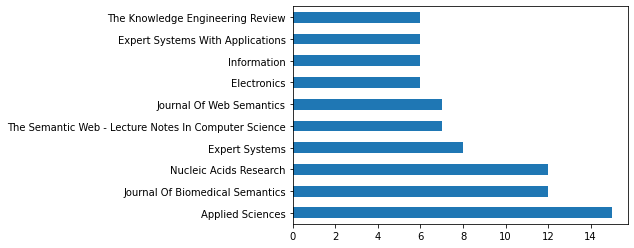

In [ ]:
publication_venue_plot = publication_venue_count.plot(kind = "barh")
print("publication_venue_plot:\n")
print(type(publication_venue_plot))

type_plot:

<class 'matplotlib.axes._subplots.AxesSubplot'>


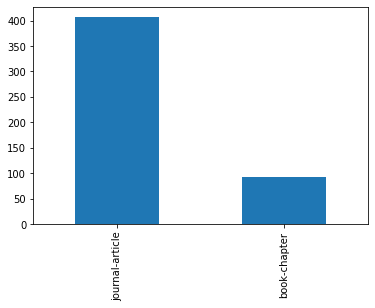

In [ ]:
type_plot = type_count.plot(kind = "bar")
print("type_plot:\n")
print(type(type_plot))

In [ ]:
publication_year_count = GRAPH_publicationDF_CSV["publication_year"].value_counts()
print("publication_year_count:\n")
print(publication_year_count) 

publication_year_count:

2021    124
2020    110
2019    103
2018     79
2017     36
2016     19
2014     11
2015      9
2022      7
2011      1
2013      1
Name: publication_year, dtype: int64


In [ ]:
publication_year_count_sorted = publication_year_count.sort_index()
print("publication_year_count_sorted:\n")
print(publication_year_count_sorted) 

publication_year_count_sorted:

2011      1
2013      1
2014     11
2015      9
2016     19
2017     36
2018     79
2019    103
2020    110
2021    124
2022      7
Name: publication_year, dtype: int64


publication_year_plot:

<class 'matplotlib.axes._subplots.AxesSubplot'>


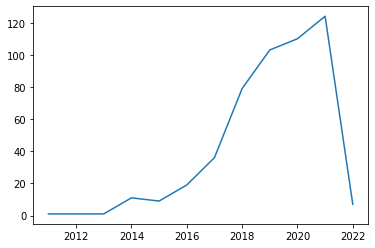

In [ ]:
publication_year_plot = publication_year_count_sorted.plot()
print("publication_year_plot:\n")
print(type(publication_year_plot))

## <font size="5">Graph_publication.json:</font>


In [ ]:
from pandas.core.frame import DataFrame
from json import load

with open("/content/drive/MyDrive/unibo/DHDK_magistrale/courses/DataScience/FinalProject/GitRep/datascience/graph_db/graph_other_data.json", "r", encoding="utf-8") as jsn:
    GRAPH_publicationDF_JSON = load(jsn)
    print("publicationDF_JSON:\n")
    print(publicationDF_JSON)

publicationDF_JSON:

{'authors': {'doi:10.1162/qss_a_00023': [{'family': 'Peroni', 'given': 'Silvio', 'orcid': '0000-0003-0530-4305'}, {'family': 'Shotton', 'given': 'David', 'orcid': '0000-0001-5506-523X'}], 'doi:10.1007/s11192-019-03217-6': [{'family': 'Heibi', 'given': 'Ivan', 'orcid': '0000-0001-5366-5194'}, {'family': 'Peroni', 'given': 'Silvio', 'orcid': '0000-0003-0530-4305'}, {'family': 'Shotton', 'given': 'David', 'orcid': '0000-0001-5506-523X'}], 'doi:10.1007/s11192-019-03311-9': [{'family': 'Zhu', 'given': 'Yongjun', 'orcid': '0000-0003-4787-5122'}], 'doi:10.1038/sdata.2016.18': [{'family': 'Wilkinson', 'given': 'Mark D.', 'orcid': '0000-0001-6960-357X'}, {'family': 'Dumontier', 'given': 'Michel', 'orcid': '0000-0003-4727-9435'}, {'family': 'Aalbersberg', 'given': 'Ijsbrand Jan', 'orcid': '0000-0002-0209-4480'}, {'family': 'Appleton', 'given': 'Gabrielle', 'orcid': '0000-0003-0179-7384'}, {'family': 'Axton', 'given': 'Myles', 'orcid': '0000-0002-8042-4131'}, {'family': 'Baak

In [ ]:
from json import loads
from pandas import json_normalize

# VENUE_ID 

venues_df = GRAPH_publicationDF_JSON["venues_id"]
Venues_IdDF = DataFrame(venues_df.items(), columns=['doi', 'issn_isbn']).explode('issn_isbn')

print("Venues_IdDF:\n")
print(str(Venues_IdDF) + "\n")
print("Venues_IdDF_info:\n")
print(str(Venues_IdDF.info()) + "\n")
print("Venues_IdDF_describe:\n")
print(str(Venues_IdDF.describe(include="all")) + "\n")


# REFERENCE 

citesDF = GRAPH_publicationDF_JSON["references"]
cites_df=DataFrame(citesDF.items(),columns=['citing','cited']).explode('cited')
cites_df=json_normalize(loads(cites_df.to_json(orient="records")))
cites_df.rename(columns={"References.keys()":"citing","References.values()":"cited"}, inplace = True)
referencesDF = cites_df

print("referencesDF:\n")
print(str(referencesDF) + "\n")
print("referencesDF_info:\n")
print(str(referencesDF.info()) + "\n")
print("referencesDF_describe:\n")
print(str(referencesDF.describe(include="all")) + "\n")

# PUBLISHER 

crossref = GRAPH_publicationDF_JSON["publishers"]
id_and_name = crossref.values()
organization_df = DataFrame(id_and_name)
Organization_DF = organization_df 

print("publisherDF:\n")    
print(str(Organization_DF) + "\n")
print("publisherDF_info:\n")
print(str(Organization_DF.info()) + "\n")
print("publisherDF_describe:\n")
print(str(Organization_DF.describe(include="all")) + "\n")

Venues_IdDF:

                                  doi           issn_isbn
0    doi:10.1016/j.websem.2021.100655      issn:1570-8268
1       doi:10.1007/s10115-017-1100-y      issn:0219-1377
1       doi:10.1007/s10115-017-1100-y      issn:0219-3116
2    doi:10.1016/j.websem.2014.03.003      issn:1570-8268
3              doi:10.1093/nar/gkz997      issn:0305-1048
..                                ...                 ...
483               doi:10.1145/3309547      issn:1558-2868
484  doi:10.1007/978-3-030-58285-2_27  isbn:9783030582845
484  doi:10.1007/978-3-030-58285-2_27  isbn:9783030582852
485    doi:10.1007/s11280-020-00842-7      issn:1386-145X
485    doi:10.1007/s11280-020-00842-7      issn:1573-1413

[754 rows x 2 columns]

Venues_IdDF_info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   doi        754 non-null    object
 1   issn_isbn  754 non-n

In [ ]:
# PERSON

author = GRAPH_publicationDF_JSON["authors"]
person_df= DataFrame(author.items(),columns=['doi','author']).explode('author')
person_df= json_normalize(loads(person_df.to_json(orient="records")))
person_df.rename(columns={"author.family":"family_name","author.given":"given_name","author.orcid":"orc_id"}, inplace = True)
person_df.drop("doi", axis =1, inplace = True)
person_DF = person_df.drop_duplicates(subset = ["orc_id"])

print("person_DF:\n")    
print(str(person_DF) + "\n")
print("person_DF_info:\n")
print(str(person_DF.info()) + "\n")
print("person_DF_describe:\n")
print(str(person_DF.describe(include="all")) + "\n")

# AUTHOR

author = GRAPH_publicationDF_JSON["authors"]
author_df=DataFrame(author.items(),columns=['doi','author']).explode('author')
author_df = json_normalize(loads(author_df.to_json(orient="records")))
author_df.rename(columns={"author.family":"family_name","author.given":"given_name","author.orcid":"orc_id"}, inplace = True)
author_df.drop("family_name", axis=1, inplace = True)
author_df.drop("given_name", axis =1, inplace = True)
author_DF = author_df

print("author_DF:\n")    
print(str(author_DF) + "\n")
print("author_DF_info:\n")
print(str(author_DF.info()) + "\n")
print("author_DF_describe:\n")
print(str(author_DF.describe(include="all")) + "\n")


# AUTHOR_PERSON_JOINED

author_person_joined = author_DF.merge(person_DF, left_on='orc_id', right_on='orc_id')

print("author_person_joined:\n")    
print(author_person_joined)

person_DF:

         family_name given_name               orc_id
0     Espinoza-Arias      Paola  0000-0002-3938-2064
1             Garijo     Daniel  0000-0003-0454-7145
2             Corcho      Oscar  0000-0002-9260-0753
3         Diefenbach     Dennis  0000-0002-0046-2219
4              Groth       Paul  0000-0003-0183-6910
...              ...        ...                  ...
1427            Wang      Xiang  0000-0002-6148-6329
1428          Martin       Leon  0000-0002-6747-5524
1429       Boockmann     Jan H.  0000-0001-6816-8393
1430         Henrich    Andreas  0000-0002-5074-3254
1431              Li        Lin  0000-0001-7553-6916

[1184 rows x 3 columns]

person_DF_info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184 entries, 0 to 1431
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   family_name  1184 non-null   object
 1   given_name   1184 non-null   object
 2   orc_id       1184 non-null   objec

cited_barchart:

<class 'matplotlib.axes._subplots.AxesSubplot'>


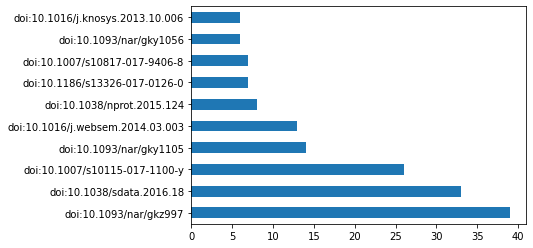

In [ ]:
# CITED_1 FROM REFERENCE


cited_plot = referencesDF["cited"].value_counts()[:10].plot(kind="barh")
print("cited_barchart:\n")
print(type(cited_plot))

cited_piechart:

<class 'matplotlib.axes._subplots.AxesSubplot'>


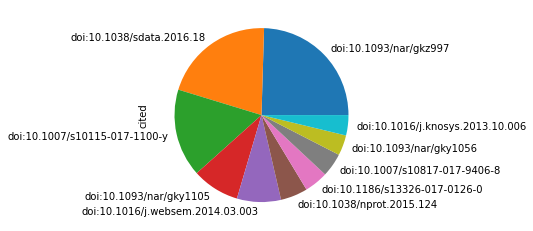

In [ ]:

# CITED_2 


cited_piechart = referencesDF["cited"].value_counts()[:10].plot(kind="pie")
print("cited_piechart:\n")
print(type(cited_piechart))

name_barchart:

<class 'matplotlib.axes._subplots.AxesSubplot'>


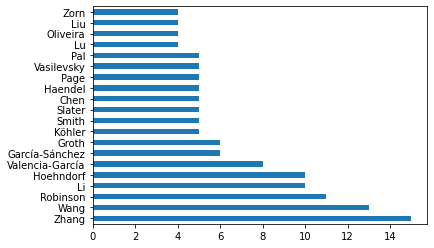

In [ ]:
# NAME FROM AUTHOR_DF


name_barchart = author_person_joined["family_name"].value_counts()[:20].plot(kind="barh")
print("name_barchart:\n")
print(type(name_barchart))

name_piechart:

<class 'matplotlib.axes._subplots.AxesSubplot'>


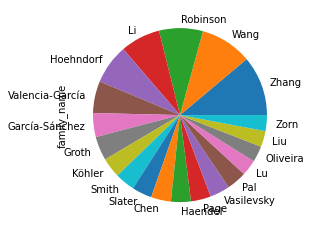

In [ ]:
# NAME_2 


name_piechart = author_person_joined["family_name"].value_counts()[:20].plot(kind="pie")
print("name_piechart:\n")
print(type(name_piechart))



## <font size="7"><b>Workflow</b></font>

All the classes and method defined in this project have been organized in the following files: <br>
-<b>impl.py</b> contains: UML data model classes, QueryProcessor class, TriplestoreProcess class, TriplestoreDataProcessor class, TriplestoreQueryProcessor class, RelationalProcessor class, RelationalDataProcessor class, RelationalQueryProcessor class and GenericQueryProcessor class.<br> 
-<b> extraclassesandfunctions.py</b> contains: DataCSV class, DataJSON class, getStringOfPythonObject function, CleanSparqlStore function, CleanRelationaldatabase function and AddToSparqlStore function. 
## <font size='5'> Implementation of the UML data model classes in Python </font>
After the analysis of data we passed to the implementation of the UML data model classes. Following the UML model we have created eleven classes:<br>
- IdentifiableEntity class;<br>
- Publication class; <br>
-  Person class; <br>
- Venue class; <br>
- Organization class; <br>
- JournalArticle class; <br>
- BookChapter class; <br>
- ProceedingsPaper class; <br>
- Journal class; <br>
- Book class; <br>
- Proceedings class; <br>
Besides the requested methods by the UML model we have decided to add a __str__() method in each class. This one is useful to transform, if needed, the python objects obtained by the GenericQueryProcessor class into strings. In fact, the result of a GenericQueryProcessor method is rendered through the python object memory address, that is not human readable. In order to avoid code duplication we developed a function to accomplish this task: getStringOfPythonObject().  


In [ ]:
def getStringOfPythonObject(gp):
        result=[]
        for el in gp:
            result.append(el.__str__())
        return result  

In [ ]:
#object classes -----------------------------------------------------------------------------------------------------------------------#


class IdentifiableEntity(object):
    def __init__(self, id):
        self.id = id

    def getIds(self):
        result = []
        for identifier in self.id:
            result.append(identifier)
        result.sort()
        return result


class Publication(IdentifiableEntity):
    def __init__(self, id, publication_year, title, publicationVenue):

        self.publication_year = publication_year
        self.title = title
        self.PublicationVenue = publicationVenue
        super().__init__(id)

    def __str__(self):
        return str([self.id, self.publication_year, self.title, self.PublicationVenue])

    def getPublicationYear(self):
        if self.publication_year:
            return self.publication_year

    def getTitle(self):
        return self.title

    def getPublicationVenue(self):
        return self.getPublicationVenue


class Person(IdentifiableEntity):
    def __init__(self, id, givenName, familyName):

        self.givenName = givenName
        self.familyName = familyName
        super().__init__(id)

    def __str__(self):
        return str([self.id, self.givenName, self.familyName])

    def getGivenName(self):
        return self.givenName

    def getFamilyName(self):
        return self.familyName


class Venue(IdentifiableEntity):  
    def __init__(self, id, publication_venue, publisher): 
        self.publisher = publisher
        self.publication_venue = publication_venue
        super().__init__(id)

    def __str__(self):
        return str([self.id, self.publication_venue, self.publisher])

    def getPublicationVenue(self):
        return self.publication_venue

    def getPublisher(self):
        return self.publisher


class Organization(IdentifiableEntity):
    def __init__(self, id, name):
        self.name = name
        super().__init__(id)

    def __str__(self):
        return str([self.id, self.name])

    def __str__(self):
        return str([self.id, self.name])

    def getName(self):
        return self.name


class JournalArticle(Publication):
    def __init__(self, id, publication_year, title, publication_venue, issue, volume):
        self.publication_venue = publication_venue
        self.issue = issue
        self.volume = volume
        super().__init__(id, publication_year, title, publication_venue)

    def __str__(self):
        return str([self.id, self.publication_year, self.title, self.publication_venue, self.issue, self.volume])

    def getIssue(self):
        if self.issue:
            return self.issue
        else:
            return None

    def getVolume(self):
        if self.volume:
            return self.volume
        else:
            return None


class BookChapter(Publication):
    def __init__(self, id, publication_year, title, publicationVenue, chapterNumber):
        self.chapterNumber = chapterNumber
        super().__init__(id, publication_year, title, publicationVenue)

    def getChapterNumber(self):
        return self.chapterNumber


class ProceedingsPaper(Publication):
    def __init__(self, id, publication_year, title, publicationVenue):
        super().__init__(id, publication_year, title, publicationVenue)


class Journal(Venue):
    def __init__(self, id, title, publisher):
        super().__init__(id, title, publisher)


class Book(Venue):
    def __init__(self, id, title, publisher):
        super().__init__(id, title, publisher)


class Proceedings(Venue):
    def __init__(self, id, publication_venue, publisher, event):
        self.event = event
        super().__init__(id, publication_venue, publisher)

    def __str__(self):
        return str([self.id, self.publication_venue, self.publisher, self.event])

    def getEvent(self):
        return self.event


Secondly, for the implementation of both relational and graph databases, we started with the creation of data frames relying on the provided UML model, in order to describe all the entities we needed. Since the project specifications impose the loading of the CSV and JSON files independently, we created the data frames on the basis of the content of each file provided. From the CSV data we were able to produce eight data frames:


1. <b> VenueId </b>: VenueId is made of four columns:
- <b>id</b>: a column defining the strings referring to the internal identifiers of each venue.  <br>
- <b> title </b>: each venue's name taken from "publication_venue" column of the CSV. <br>
- <b> venue_type </b> : a column specifying the type of each venue. <br>
- <b> publisherId </b>: the identifier of the organization the venue belongs to. 
2. <b>Publications</b>: Following the UML model we thought it would have been less redundant for the query part to create a unique table for all the publications in which they are distinguished thanks to the "type" column. This data frame is made of six columns, respectively: id, title, type, publicationYear, venue_type and publicationVenueId. This last contains all the venues identifier obtained from the id column of VenueId's data frame. <br>
3.  <b> JournalArticle</b>: in order to be coherent with the UML model we have also created a JournalArticle data frame containing a column for all the doi of type == 'journal-article' present in Publications and two columns respectively for issue and volume. In fact, as shown in the UML, these latter are two exclusive properties of this class. <br>

4.  <b> BookChapter</b>: As for the JournalArticle data frame we have created a BookChapter one made of two columns: one for all the doi of type == "book-chapter" present in Publications and one for chapter, a specific property of BookChapter. <br>

5.  <b> ProceedingPaper</b>: Even if there are no information about proceedings paper, since there is not any publication of type == "proceeding-paper", in order to follow the UML, we have created this dataframe with the supposed doi of proceedings paper. 
6.  <b> Book / Journal / Proceeding</b>: In order to be coherent with the UML model we have created also three tables for each son of Venue made of one column with their "publicationVenueId" taken from "Publications" data frame. Proceeding is the only one with also an Event column for its event attribute.   


From the JSON file we were able to produce five data frames: 

 1.<b> Venue</b>: the Venue data frame is made of two columns: "doi" and "issn_isbn"; each row connects a doi to one or more issn or isbn. 
2. <b> Authors </b>: the Authors data frame contains two columns: "doi" and "orc_id"; each row connects a doi to one of its authors using their orcid number. 
3. <b>Cites</b>: the Cites dataframe is made of two columns: "citing" and "cited". The first contains the citing dois while the second all the cited ones. 
4.<b> Person</b>: the Person data frame is made of three columns: "family_name", "given_name" and "orc_id". It simply groups all the authors contained in the file. 
5.<b> Organization</b>: the Organization data frame is made of two columns: "id" and "name". It contains the information about the unique id of each organization and its relative name. 

For the creation of the data frames we have decided to implement two extra classes: <b>DataCSV</b>, that is responsible for the creation of dataframes if the uploaded file is in CSV format, and <b>DataJSON</b>, if the file is in JSON format. Both classes check whether the input file extension is correct; if so, they start creating all the data frames, otherwise, they throw an exception containing a printed warning. 
These classes are then called in respectively, the RelationalDataProcessor for the relational database, and the TriplestoreDataProcessor for the graph database. These latters have the task to upload the collection of data into the databases with their uploadData() method. 

In [ ]:
class DataCSV(object): 
    def __init__(self, csv):

        if os.path.exists(csv):
            PublicationsDF = pd.read_csv(csv , keep_default_na= False,
                        dtype={
                                    "id": "string",
                                    "title": "string",
                                    "type": "string",
                                    "publication_year": "string",
                                    "issue": "string",
                                    "volume": "string",
                                    "chapter": "string",
                                    "publication_venue": "string",
                                    "venue_type": "string",
                                    "publisher": "string",
                                    "event": "string"
                        },encoding="utf-8")\
                .rename(columns={"publication_year" : "publicationYear"})


            not_unq = PublicationsDF.filter(items=['publication_venue', 'venue_type', 'publisher'])\
            .drop_duplicates()\
            .groupby("publication_venue")\
            .count()\
            .query('venue_type >1 or publisher >1')
            if len(not_unq) > 0:
                print(" *** WARNING - 'venue_type' or 'publisher' are not unique for each 'publication_venue'")
                print(not_unq)
            else:
                print(" --- OK: 'publication_venue's have unique 'venue_type's and 'publisher'")

            # DATAFRAME FROM CSV

            #VENUE DATAFRAME FROM CSV
            VenueDF =  PublicationsDF[["publication_venue", 'venue_type', 'publisher']]\
                .drop_duplicates()\
                .dropna()
            VenueDF.insert(0, 'id', range(0, VenueDF.shape[0]))
            VenueDF['id'] = VenueDF['id'].apply(lambda x: 'venue-' + str(int(x)))
            self.Venue_DF = VenueDF.rename(columns={"publication_venue" : "venueName", "publisher" : "publisherId"})

            #PUBLICATION DATAFRAME 
            
            Publication_df = pd.merge(
            PublicationsDF[["id", "publicationYear", "title", "type", "event", "publication_venue"]],
            self.Venue_DF.rename(columns={"id" : "publicationVenueId", "venueName" : "publication_venue"}), 
            on="publication_venue")\
            .drop(columns=["publication_venue", "publisherId"])
            self.Publications_DF = Publication_df[["id", "title", "type", "publicationYear", "venue_type", "publicationVenueId"]]

            #BOOK CHAPTER DATAFRAME
            book_chapter_df = PublicationsDF.query("type == 'book-chapter'")
            self.Book_chapter_DF = book_chapter_df[["id", "chapter"]]
            
            #JOURNAL ARTICLE DATAFRAME
            journal_article_df = PublicationsDF.query("type == 'journal-article'")
            self.Journal_article_DF = journal_article_df[["id", "issue", "volume"]]

            #PROCEEDINGS PAPER DATAFRAME 
            proceedings_paper_df = PublicationsDF.query("type == 'proceeding-paper'")
            self.Proceedings_paper_DF = proceedings_paper_df[["id"]]
            
            #BOOK DATAFRAME
            book_df = self.Publications_DF.query("venue_type == 'book'")
            book_df = book_df[["publicationVenueId"]]
            self.Book_DF = book_df.rename(columns={"publicationVenueId":"bookId"}).drop_duplicates(subset=["bookId"])

            #JOURNAL DATAFRAME
            journal_df = self.Publications_DF.query("venue_type == 'journal'")
            journal_df= journal_df[["publicationVenueId"]]
            self.Journal_DF = journal_df.rename(columns={"publicationVenueId":"journalId"}).drop_duplicates(subset=["journalId"])
           
            #PROCEEDINGS DATAFRAME
            proceedings_df= Publication_df.query("venue_type == 'proceedings'")
            proceedings_df = proceedings_df[["publicationVenueId", "event"]]
            self.Proceedings_DF = proceedings_df.rename(columns={"publicationVenueId":"proceedingId"}).drop_duplicates(subset=["proceedingId"])

        else:
            raiseExceptions("CSV file '" + csv + "' does not exist!")

    
    
class DataJSON(object):
    def __init__(self, jsn):

        if os.path.exists(jsn):
        # read JSON 
            with open(jsn, "r", encoding="utf-8") as f:
                json_doc = load(f)

            # DATAFRAME FROM JSON 
        
            #VENUE DATAFRAME
            venues_df = json_doc["venues_id"]
            self.VenuesId_DF = pd.DataFrame(venues_df.items(), columns=['doi', 'issn_isbn']).explode('issn_isbn')
        
            #AUTHOR DATAFRAME
            author = json_doc["authors"]
            author_df=DataFrame(author.items(),columns=['doi','author']).explode('author')
            author_df = pd.json_normalize(json.loads(author_df.to_json(orient="records")))
            author_df.rename(columns={"author.family":"family_name","author.given":"given_name","author.orcid":"orc_id"}, inplace = True)
            author_df.drop("family_name", axis=1, inplace = True)
            author_df.drop("given_name", axis =1, inplace = True)
            self.Author_DF = author_df
           
            #CITES DATAFRAME
            References = json_doc["references"]
            cites_df=pd.DataFrame(References.items(),columns=['citing','cited']).explode('cited')
            cites_df=pd.json_normalize(json.loads(cites_df.to_json(orient="records")))
            cites_df.rename(columns={"References.keys()":"citing","References.values()":"cited"}, inplace = True)
            self.Cites_DF = cites_df   
            

            #PERSON DATAFRAME 
            author = json_doc["authors"]
            person_df=pd.DataFrame(author.items(),columns=['doi','author']).explode('author')
            person_df=pd.json_normalize(json.loads(person_df.to_json(orient="records")))
            person_df.rename(columns={"author.family":"family_name","author.given":"given_name","author.orcid":"orc_id"}, inplace = True)
            person_df.drop("doi", axis =1, inplace = True)
            self.Person_DF = person_df.drop_duplicates(subset = ["orc_id"])
            

            #ORGANIZATION DATAFRAME 
            crossref = json_doc["publishers"]
            id_and_name = crossref.values()
            organization_df = pd.DataFrame(id_and_name)
            self.Organization_DF = organization_df 

        else:
            raiseExceptions("JSON file '" + jsn + "' does not exist!")



Before the implementation of RelationalDataProcessor and TriplestoreDataProcessor we implemented their superclasses RelationalProcessor and TriplestoreProcessor. They have two methods: <br>
1. <b>setDbPath/setEndpointUrl</b>: responsible for the setting of a new path for the database or a new URL for the SPARQL endpoint of the triplestore. <br>
2. <b>getDbPath/getEndpointUrl</b>: returns the path of the database or the URL for the SPARQL enpoint of the triplestore. <br>



In [ ]:
class RelationalProcessor(object):
    def __init__(self, dbPath=""):

        self.dbPath = dbPath

    def setDbPath(self, dbPath):
        self.dbPath = dbPath
        return True

    def getDbPath(self):
        return self.dbPath

class TriplestoreProcessor(object):
    def __init__(self):
        self.endpointUrl = ""

    def setEndpointUrl(self, url):
        self.endpointUrl = url

    def getEndpointUrl(self):
        return self.endpointUrl


#RELATIONALDATAPROCESSOR

class RelationalDataProcessor(RelationalProcessor):
    def __init__(self, dbPath=""):
        super().__init__(dbPath)

    def uploadData(self, path):  # path to input data file
        print("dbpath =" + self.getDbPath())
        f_ext = os.path.splitext(path)[1]
        if f_ext.upper() == ".CSV":
            CSV_Rdata = DataCSV(path)
            with connect(self.getDbPath()) as con:
                CSV_Rdata.Venue_DF.to_sql(
                    "VenueId", con, if_exists="replace", index=False)
                CSV_Rdata.Book_DF.to_sql(
                    "Book", con, if_exists="replace", index=False)
                CSV_Rdata.Publications_DF.to_sql(
                    "Publications", con, if_exists="replace", index=False)
                CSV_Rdata.Journal_DF.to_sql(
                    "Journal", con, if_exists="replace", index=False)
                CSV_Rdata.Proceedings_DF.to_sql(
                    "Proceeding", con, if_exists="replace", index=False)
                CSV_Rdata.Proceedings_paper_DF.to_sql(
                    "ProceedingPaper", con, if_exists="replace", index=False)
                CSV_Rdata.Journal_article_DF.to_sql(
                    "JournalArticle", con, if_exists="replace", index=False)
                CSV_Rdata.Book_chapter_DF.to_sql(
                    "BookChapter", con, if_exists="replace", index=False)
                

                con.commit()

        elif f_ext.upper() == ".JSON":
            JSN_Rdata = DataJSON(path)
            with connect(self.getDbPath()) as con:
                JSN_Rdata.Author_DF.to_sql(
                    "Authors", con, if_exists="replace", index=False)
                JSN_Rdata.Cites_DF.to_sql(
                    "Cites", con, if_exists="replace", index=False)
                JSN_Rdata.Organization_DF.to_sql(
                    "Organization", con, if_exists="replace", index=False)
                JSN_Rdata.VenuesId_DF.to_sql(
                    "Venue", con, if_exists="replace", index=False)
                JSN_Rdata.Person_DF.to_sql(
                    "Person", con, if_exists="replace", index=False)
                
                con.execute("DROP VIEW IF EXISTS countCited")
                con.execute("CREATE VIEW countCited AS "
                            "SELECT cited, count(*) AS N FROM Cites GROUP BY cited HAVING cited IS NOT NULL;")
                con.execute("DROP VIEW  IF EXISTS maxCited")
                con.execute("CREATE VIEW maxCited AS "
                            "SELECT * FROM countCited WHERE N = (SELECT MAX(N) FROM countCited);")

            con.commit()
        else:
            raiseExceptions("Problem: the input file has not neither a .csv nor a .json extension!")

#TRIPLESTOREDATAPROCESSOR

class TriplestoreDataProcessor(TriplestoreProcessor):
    def __init__(self):
        super().__init__()

    def uploadData(self, path):
        f_ext = os.path.splitext(path)[1]
        if f_ext.upper() == ".CSV":
            CSV_Rdata = DataCSV(path)

            base_url = "https://github.com/giorgimariachiara/datascience/res/"

            JournalArticle = URIRef("https://schema.org/ScholarlyArticle")
            BookChapter = URIRef("https://schema.org/Chapter")
            Proceedingspaper = URIRef("http://purl.org/spar/fabio/ProceedingsPaper")
            Journal = URIRef("https://schema.org/Periodical")
            Book = URIRef("https://schema.org/Book")
            Proceeding = URIRef("http://purl.org/ontology/bibo/Proceedings") 
            Publication = URIRef("https://schema.org/CreativeWork")


            publicationYear = URIRef("https://schema.org/datePublished")
            title = URIRef("https://schema.org/name")
            issue = URIRef("https://schema.org/issueNumber")
            volume = URIRef("https://schema.org/volumeNumber")
            identifier = URIRef("https://schema.org/identifier")
            chapter = URIRef("https://schema.org/Chapter")
            event = URIRef("https://schema.org/event") 
            publisher = URIRef("https://schema.org/publisher")
            name = URIRef("https://schema.org/name")

            publicationVenue = URIRef("https://schema.org/isPartOf")

            my_graph = Graph()

            for idx, row in CSV_Rdata.Publications_DF.iterrows():  
                subj = URIRef(base_url + row["id"]) 

                my_graph.add((subj, RDF.type, Publication))
                if row["title"] != "":
                    my_graph.add((subj, title, Literal(row["title"])))
                if row["id"] != "":    
                    my_graph.add((subj, identifier, Literal(row["id"])))
                if row["publicationYear"] != "":
                    my_graph.add((subj, publicationYear, Literal(row["publicationYear"])))
                if row["publicationVenueId"] != "":
                    my_graph.add((subj, publicationVenue, URIRef(base_url + row["publicationVenueId"])))

                if row["type"] == "journal-article":
                    if row["type"] != "":
                        my_graph.add((subj, RDF.type, JournalArticle)) 
                elif row["type"] == "book-chapter":
                    if row["type"] != "":
                        my_graph.add((subj, RDF.type, BookChapter))
                elif row["type"]== "proceedings-paper":
                    if row["type"] != "":
                        my_graph.add((subj, RDF.type, Proceedingspaper)) 
                else: 
                    print("WARNING: Unrecognized publication type!")
            
            for idx, row in CSV_Rdata.Venue_DF.iterrows():
                subj = URIRef(base_url + row["id"])

                if row["title"] != "":
                    my_graph.add((subj, name, Literal(row["venueName"])))
                if row["id"] != "":
                    my_graph.add((subj, identifier, Literal(row["id"])))
                if row["publisherId"] != "":
                    my_graph.add((subj, publisher, Literal(row["publisherId"])))

                     
            #triple publications type

            for idx, row in CSV_Rdata.Journal_article_DF.iterrows():
                subj = URIRef(base_url + row["id"])
 
                if row["issue"] != "":
                    my_graph.add((subj, issue, Literal(row["issue"])))
                if row["volume"] != "":
                    my_graph.add((subj, volume, Literal(row["volume"])))
            
            for idx, row in CSV_Rdata.Book_chapter_DF.iterrows():
                subj = URIRef(base_url + row["id"])
                
                if row["chapter"] != "": 
                    my_graph.add((subj, chapter, Literal(row["chapter"])))
            
            #triple Venue type 
            
            for idx, row in CSV_Rdata.Book_DF.iterrows():
                local_id = "book-" + str(idx)
                subj = URIRef(base_url + local_id)
                if row["bookId"] != "":
                    my_graph.add((subj, identifier, Literal(row["bookId"])))
                my_graph.add((subj, RDF.type, Book))

            for idx, row in CSV_Rdata.Journal_DF.iterrows():
                local_id = "journal-" + str(idx)
                subj = URIRef(base_url + local_id)
                if row["journalId"] != "":
                    my_graph.add((subj, identifier, Literal(row["journalId"])))
                my_graph.add((subj, RDF.type, Journal))
            
            for idx, row in CSV_Rdata.Proceedings_DF.iterrows():
                local_id = "proceeding-" + str(idx)
                subj = URIRef(base_url + local_id) 
                my_graph.add((subj, RDF.type, Proceeding))
                if row["proceedingId"] != "":
                    my_graph.add((subj, identifier, Literal(row["proceedingId"])))
                if row["event"] != "":  
                    my_graph.add((subj, event, Literal(row["event"])))
                
                
            self.my_graph= my_graph

            endpointUrl = self.getEndpointUrl()
            AddToSparqlStore(endpointUrl, my_graph)

            print("Data from CSV file has been uploaded!")
            
        elif f_ext.upper() == ".JSON":
            JSN_Rdata = DataJSON(path)

            base_url = "https://github.com/giorgimariachiara/datascience/res/"

            Person = URIRef("https://schema.org/Person")
            Organization = URIRef("https://schema.org/Organization")

            identifier = URIRef("https://schema.org/identifier")
            familyName = URIRef("https://schema.org/familyName")
            givenName = URIRef("https://schema.org/givenName") 
            name = URIRef("https://schema.org/name")
            citation = URIRef("https://schema.org/citation")
            author = URIRef("https://schema.org/author")
            issn_isbn = URIRef("http://purl.org/dc/terms/identifier")


            my_graph = Graph()

            for idx, row in JSN_Rdata.Organization_DF.iterrows():
                subj = URIRef(base_url + row["id"])

                my_graph.add((subj, RDF.type, Organization))
                my_graph.add((subj, name, Literal(row["name"])))  
                my_graph.add((subj, identifier, Literal(row["id"])))

            for idx, row in JSN_Rdata.Cites_DF.iterrows():
                subj = URIRef(base_url + row["citing"])

                if row["cited"] != None:
                    my_graph.add((subj, citation, URIRef(base_url + str(row["cited"]))))
            
            for idx, row in JSN_Rdata.VenuesId_DF.iterrows():
                subj = URIRef(base_url + row["doi"])
                
                my_graph.add((subj, issn_isbn, Literal(row["issn_isbn"])))    

            for idx, row in JSN_Rdata.Person_DF.iterrows():
                subjperson = URIRef(base_url + row["orc_id"]) 
            
                my_graph.add((subjperson, RDF.type, Person))
                my_graph.add((subjperson, givenName, Literal(row["given_name"])))
                my_graph.add((subjperson, familyName, Literal(row["family_name"])))
                my_graph.add((subjperson, identifier, Literal(row["orc_id"])))

            for idx, row in JSN_Rdata.Author_DF.iterrows():     
                
                my_graph.add(((URIRef(base_url + row["orc_id"]), author, URIRef(base_url + row["doi"]))))

            self.my_graph = my_graph

            endpointUrl = self.getEndpointUrl()
            AddToSparqlStore(endpointUrl, my_graph)

            print("Data from JSON file has been uploaded!")

        else:
            raiseExceptions("Problem: the input file has not neither a .csv nor a .json extension!")
            



As you can see, in order to add a table to a database in Pandas we used the Dataframe method to_sql(). In addition to data frames we have also decided to
create some SQL Views. These are useful to obtain the result of two queries: MostCitedPublication and MostCitedVenue.<br>
For what concerned Triplestoredataprocessor() the steps where slightly different. In this context it was important to define the names of the classes, attributes and relations to represent the data following the data model. Here there is our definition using the class URIRef from rdflib: <br>
## <font size="4"><b>Classes of resources</b></font>
*   UML class JournalArticle = URIRef("https://schema.org/ScholarlyArticle") 
*   UML class BookChapter = URIRef("https://schema.org/Chapter")
*   UML class Proceedingspaper = URIRef("http://purl.org/spar/fabio/ProceedingsPaper")
*   UML class Journal = URIRef("https://schema.org/Periodical")
*   UML class Book = URIRef("https://schema.org/Book")
*   UML class Proceeding = URIRef("http://purl.org/ontology/bibo/Proceedings") (andava bene?) 
*   UML class Person = URIRef("https://schema.org/Person")
*   UML class Organization = URIRef("https://schema.org/Organization")
*   UML class Publication = URIRef("https://schema.org/CreativeWork")

## <font size="4"><b>Attributes and relations related to classes </b></font>
*   UML attribute doi = URIRef("https://schema.org/identifier")
*   UML attribute publicationYear = URIRef("https://schema.org/datePublished")
*   UML attribute title = URIRef("https://schema.org/name")
*   UML attribute issue = URIRef("https://schema.org/issueNumber")
*   UML attribute volume = URIRef("https://schema.org/volumeNumber")
*   UML attribute identifier = URIRef("https://schema.org/identifier")
*   UML attribute familyName = URIRef("https://schema.org/familyName")
*   UML attribute givenName = URIRef("https://schema.org/givenName") 
*   UML attribute name = URIRef("https://schema.org/name")
*   UML attribute chapter = URIRef("https://schema.org/Chapter")
*   UML attribute event = URIRef("https://schema.org/event") 
*   UML attribute publisher = URIRef("https://schema.org/publisher")
*   UML attribute issn_isbn = URIRef("http://gbol.life/ontology/bibo/identifier/")
*   UML attribute citation = URIRef("https://schema.org/citation")
*   UML relation publicationVenue = URIRef("https://schema.org/isPartOf") <br>
<br>
These have then been used to create all the necessary triples (subject, predicate, object) to populate the database. Since an object can also be a literal we used the class Literal to create them. Even in this case we decided to start from the different data frames in order to populate the database. For the TriplestoreDataProcessor we have added a new function that is  AddToSparqlStore(). It simply uploads the graph on the triplestore using the class SPARQLUpdateStore, which acts as a proxy to interact with the triplestore. The first thing to do is to open the connection with the store, passing as input a tuple of two strings with the same URLs, defining the SPARQL endpoint of the triplestore where to upload the data. Secondly, it uploads triple by triple using a for-each iteration over the list of RDF statements obtained by using the method triples of the class Grapph, passing as input a tuple with three None  values. <br>


In [ ]:
def AddToSparqlStore(endpoint, graph):
    store = SPARQLUpdateStore()
    # The URL of the SPARQL endpoint is the same URL of the Blazegraph
    # instance + '/sparql'
    # endpoint = 'http://127.0.0.1:9999/blazegraph/sparql'
    # It opens the connection with the SPARQL endpoint instance
    store.open((endpoint, endpoint))
    for triple in graph.triples((None, None, None)):
        store.add(triple)
    # Once finished, remember to close the connection
    store.close()        
    return graph.__len__() #chiedere se serve 

The next step has been the implementation of RelationalQueryProcessor and TriplestoreQueryProcessor although before it was necessary to create their second superclass QueryProcessor. 

In [ ]:
class QueryProcessor(object):
    def __init__(self):
        pass

## <font size="5"><b>Relational Query Processor</b></font>

RelationalQueryProcessor is a subclass of RelationalProcessor and Queryprocessor and inherits all their attributes and relations. What we had to define were all the different methods to query the database. Since it is a relational one, in order to query we used SQL: a structured query language for relational databases. Since the results of the different methods are then used in the GenericQueryProcessor, we decided to write all the queries in a such a way that their results will contain all the needed parameters for the creation of their respective objects. <br>
Example: <b>getPublicationsPublishedInYear();</b> this method returns a data frame with all the publications (i.e. the rows) that have been published in the input year. Since the result of the GenericQueryProcessor is made of Publication objects, the selected columns will match its parameters; if we look at the impl.py file, we see that the necessary parameters are id, publication year, title and publication venue; hence this would be the information gathered in this method directly from the Publications data frame joined with the VenueId one. The method will raise a TypeError exception if the input parameter will not respect its data type; in this case it has to be an integer. 

In [ ]:
# RELATIONAL QUERY PROCESSOR ----------------------------------------------------------------------------------------------------------#


class RelationalQueryProcessor(RelationalProcessor, QueryProcessor):
    def __init__(self):
        super().__init__()

    def getPublicationsPublishedInYear(self, publicationYear):
        if type(publicationYear) == int:
            with connect(self.getDbPath()) as con:
                SQL = "SELECT A.id, A.publicationYear, A.title, B.venueName FROM Publications AS A LEFT JOIN VenueId AS B ON A.PublicationVenueId == B.id WHERE publicationYear = " + \
                    str(publicationYear) + ";"
                return read_sql(SQL, con)
        else:
            raise TypeError("The input parameter publicationYear is not an integer!")

    def getPublicationsByAuthorId(self, orcid):
        if type(orcid) == str:
            with connect(self.getDbPath()) as con:
                SQL = "SELECT A.id, A.publicationYear, A.title, C.venueName FROM Publications AS A JOIN Authors AS B ON A.id == B.doi JOIN VenueId AS C ON A.PublicationVenueId == C.id WHERE B.orc_id = '" + orcid + "';"
                return read_sql(SQL, con)
        else: 
            raise TypeError("The input parameter orcid is not a string!")

    def getMostCitedPublication(self):
        with connect(self.getDbPath()) as con:
            SQL = "SELECT A.id, A.publicationYear, A.title, B.venueName FROM Publications AS A JOIN maxCited AS C ON A.id = C.cited JOIN VenueId AS B ON A.PublicationVenueId == B.id"
            return read_sql(SQL, con)

    def getMostCitedVenue(self):
        with connect(self.getDbPath()) as con:
            SQL = "SELECT A.id, A.venueName, A.publisherId FROM VenueId AS A JOIN Publications AS B ON B.publicationVenueId == A.id JOIN maxCited ON B.id == cited"
        return read_sql(SQL, con) 

    def getVenuesByPublisherId(self, publisher):
        if type(publisher) == str:
            with connect(self.getDbPath()) as con:
                SQL = read_sql("SELECT id, venueName, publisherId FROM VenueId WHERE publisherId = '" + publisher + "'", con)
            return SQL.drop_duplicates(subset=['venueName', 'publisherId'])
        else: 
            raise TypeError("The input parameter publisher is not a string!")  
 
    def getPublicationInVenue(self, issn_isbn):
        if type(issn_isbn) == str:
            with connect(self.getDbPath()) as con:
                SQL ="SELECT A.id, A.publicationYear, A.title, C.venueName FROM Publications AS A JOIN Venue AS B ON A.id == B.doi JOIN VenueId AS C ON C.id == A.publicationVenueId WHERE B.issn_isbn = '" + issn_isbn + "'"
                return read_sql(SQL, con)
        else: 
           raise TypeError("The input parameter issn_isbn is not a string!")

    def getJournalArticlesInIssue(self, issue, volume, issn): 
        if type(issue) == str and type(volume) == str and type(issn) == str:
            with connect(self.getDbPath()) as con: 
                SQL ="SELECT A.id, A.publicationYear, A.title, D.venueName, B.issue, B.volume FROM Publications AS A JOIN JournalArticle AS B ON A.id == B.id JOIN Venue AS C ON B.id == C.doi JOIN VenueId AS D ON D.id == A.publicationVenueId WHERE  B.issue = '"+ str(issue) + "' AND B.volume = '" + str(volume) + "' AND C.issn_isbn = '"+ issn + "'"
            return read_sql(SQL, con)
        else: 
            raise TypeError("All or one of the input parameters issue, volume and issn_isbn is not a string!")    

    def getJournalArticlesInVolume(self, volume, issn): 
        if type(volume) == str and type(issn) == str:
            with connect(self.getDbPath()) as con: 
                SQL ="SELECT A.id, A.publicationYear, A.title, D.venueName, B.issue, B.volume FROM Publications AS A JOIN JournalArticle AS B ON A.id == B.id JOIN Venue AS C ON B.id == C.doi JOIN VenueId AS D ON D.id == A.publicationVenueId WHERE B.volume = '" + str(volume) + "' AND C.issn_isbn = '"+ issn + "'"
            return read_sql(SQL, con) 
        else: 
            raise TypeError("All or one of the input parameters volume and issn_isbn is not a string!") 

    def getJournalArticlesInJournal(self, issn):
        if type(issn) == str:
            with connect(self.getDbPath()) as con:
                SQL = "SELECT A.id, A.publicationYear, A.title, D.venueName, B.issue, B.volume FROM Publications AS A JOIN JournalArticle AS B ON A.id == B.id JOIN Venue AS C ON B.id == C.doi JOIN VenueId AS D ON D.id == A.publicationVenueId WHERE C.issn_isbn = '" + issn + "'"
            return read_sql(SQL, con)
        else: 
            raise TypeError("The input parameter issn is not a string!") 

    def getPublicationAuthors(self, publication):
        if type(publication) == str:
            with connect(self.getDbPath()) as con: 
                SQL = "SELECT A.orc_id, A.given_name, A.family_name FROM Person AS A JOIN Authors AS B ON A.orc_id = B.orc_id WHERE B.doi = '" + publication + "';"
            return read_sql(SQL, con)
        else: 
            raise TypeError("The input parameter publication is not a string!") 

    def getPublicationsByAuthorName(self, name):
        if type(name) == str: 
            with connect(self.getDbPath()) as con:
                SQL = "SELECT A.id, A.publicationYear, A.title, D.venueName FROM Publications AS A JOIN Authors AS B ON A.id == B.doi JOIN Person AS C ON C.orc_id == B.orc_id JOIN VenueId AS D ON D.id == A.publicationVenueId WHERE C.given_name LIKE '%" + name + "%'"
            return read_sql(SQL, con)
        else: 
            raise TypeError("The input parameter name is not a string!")
        
    
    def getProceedingsByEvent(self, eventPartialName): 
        if type(eventPartialName) == str: 
            with connect(self.getDbPath()) as con:
                eventPartialName.lower()
                SQL = "SELECT A.id, A.venueName, A.publisherId, B.event FROM VenueId AS A JOIN Proceeding AS B ON A.venueName == B.proceedingId WHERE B.event == '%" + eventPartialName + "%'"
            return read_sql(SQL, con)
        else: 
            raise TypeError("The input parameter eventPartialName is not a string!")


    def getDistinctPublisherOfPublications(self, listOfDoi):
        for el in listOfDoi:
            if type(el) == str and type(listOfDoi) == list:
                with connect(self.getDbPath()) as con:
                    publisherDF = pd.DataFrame()
                    for doi in listOfDoi:
                        SQL = read_sql("SELECT A.id, A.name FROM Organization AS A JOIN VenueId AS B ON A.id == B.publisherId JOIN Publications AS C ON B.id == C.publicationVenueId WHERE C.id = '" + doi + "'", con)
                        publisherDF = concat([publisherDF, SQL]) 
                return  publisherDF
            else: 
                raise TypeError("The input parameter listOfDoi is not a list or one of its elements is not a string!")
            

As stated before, there are two methods in which we decided to use SQL Views. These latters are <b>"countCited"</b>, that counts how many times each doi has been cited by another one and <b>"maxCited"</b> that, from the previous view, takes all those dois whose number of citations matches the max number. These last view would be required to get the result of MostCitedPublication() and MostCitedVenue() methods. 

## <font size="5"><b>Triplestore Query Processor</b></font>







<b>TriplestoreQueryProcessor </b> is a subclass of TriplestoreProcessor and Queryprocessor and inherits all their attributes and relations. As for the RelationalQueryProcessor we had to define all the various methods to query the database. Considering that it is a graph database we used the SPARQL query language. In order to try the queries on the created database we used Blazegraph DB, a high-performance graph database supporting RDF/SPARQL APIs. Since the results of the different methods are then used in the GenericQueryProcessor() we decided to write all the queries in a such a way that their results will contain all the needed parameters for the creation of their respective objects. <br>
Example: <b> getPublicationsByAuthorId()</b>; this method returns a data frame with all the publications (i.e. the rows) that have been authored by the person having the identifier specified as input. Since the result of the GenericQueryProcessor is made of Publication objects, the selected columns will match its parameters; if we look at the impl.py file we see that the necessary parameters are id, publication year, title and publication venue. 
In this case we did not use pandas since it does not make available any reading method to interact with RDF triplestores. We used instead the sparql_datadrame library that permits to interact directly with a SPARQL endpoint provided by an RDF triplestore such as Blazegraph. This library is a wrapper for a SPARQL query and shows the answer as a pandas data frame. The function get is called to perform such an operation taking in input three parameters: the URL of the SPARQL endpoint to contact, the query to execute, and a boolean specifying if to contact the SPARQL endpoint using the POST HTTP method. 


In [ ]:
# TRIPLESTORE QUERY PROCESSOR ----------------------------------------------------------------------------------------------------------#
        
class TriplestoreQueryprocessor(TriplestoreProcessor, QueryProcessor):
    def __init__(self):
        super().__init__()
    
    def getPublicationsPublishedInYear(self, publicationYear):
        if type(publicationYear) == int:
            query = ('prefix schema:<https://schema.org/>  \
                    prefix rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#> \
                    SELECT DISTINCT ?doi ?publicationYear ?title ?venue WHERE {?s rdf:type schema:CreativeWork.\
                    ?s schema:datePublished "' + str(publicationYear) + '". \
                    ?s schema:datePublished ?publicationYear .\
                    ?s schema:name ?title . \
                    ?s schema:identifier ?doi. \
                    ?s schema:isPartOf ?publicationvenue . \
                    ?publicationvenue schema:name ?venue .  \
                    }')
            endpoint = self.getEndpointUrl()
            results = get(endpoint, query, post = True)
            
            return results 
        else: 
            raise TypeError("The input parameter publicationYear is not an integer!")

    def getPublicationsByAuthorId(self, orcid):
        if type(orcid) == str:
            query = ('prefix schema:<https://schema.org/>  \
                     SELECT ?doiLiteral ?publicationYear ?title ?venue WHERE {?author schema:identifier "' + orcid + '" . \
                     ?author schema:author ?doi . \
                     ?doi schema:identifier ?doiLiteral . \
                     ?doi schema:name ?title .  \
                     ?doi schema:datePublished ?publicationYear .  \
                     ?doi schema:isPartOf ?publicationvenue . \
                     ?publicationvenue schema:name ?venue . \
                        }')
            endpoint = self.getEndpointUrl()
            results = get(endpoint, query, post = True)
            
            return results 
        else: 
            raise TypeError("The input parameter orcid is not a string!")

    def getMostCitedPublication(self):
        query = ('prefix schema: <https://schema.org/> \
                 SELECT ?doi ?publicationYear ?title ?venueName WHERE {?citing schema:identifier ?doi . \
                ?citing schema:name ?title . \
                ?citing schema:datePublished ?publicationYear . \
                ?citing schema:isPartOf ?venueid . \
                ?venueid schema:name ?venueName .{ \
                SELECT ?citing WHERE { \
                { SELECT ?citing (COUNT(?x) as ?count) WHERE {   ?citing schema:citation ?x . } GROUP BY ?citing } \
                { SELECT (MAX(?cited) AS ?count) WHERE { \
    	        { SELECT ?citing (COUNT(?x) as ?cited) WHERE {  ?citing schema:citation ?x . }  GROUP BY ?citing }  \
                    }}}}}')
        endpoint = self.getEndpointUrl()
        results = get(endpoint, query, post = True)
        
        return results 

    def getMostCitedVenue(self):
         query= (' prefix schema: <https://schema.org/> \
                    SELECT ?venueId ?venueName ?publisher  WHERE {?citing schema:identifier ?doi . \
                    ?citing schema:isPartOf ?venueid . \
                    ?venueid schema:identifier ?venueId . \
                    ?venueid schema:name ?venueName . \
                    ?venueid schema:publisher ?publisher.  \
                    {SELECT ?citing WHERE { \
                    { SELECT ?citing (COUNT(?x) as ?count) WHERE {   ?citing schema:citation ?x . } GROUP BY ?citing } \
                    { SELECT (MAX(?cited) AS ?count) WHERE { \
    	            { SELECT ?citing (COUNT(?x) as ?cited) WHERE {  ?citing schema:citation ?x . }  GROUP BY ?citing }  \
                        }}}}}')
         endpoint = self.getEndpointUrl()
         results = get(endpoint, query, post = True)
         
         return results
    
    def getVenuesByPublisherId(self, publisher):
        if type(publisher) == str:
            query = ('prefix schema:<https://schema.org/> \
                    SELECT DISTINCT ?venueId ?venueName ?crossref WHERE { ?doi schema:isPartOf ?venue . \
                      ?venue schema:identifier ?venueId . \
                      ?venue schema:publisher "' + publisher + '" . \
                      ?venue schema:publisher ?crossref .  \
                      ?venue schema:name ?venueName . \
                       }')                                                       
                      
            endpoint = self.getEndpointUrl()
            results = get(endpoint, query, post = True)
            
            return results 
        else: 
            raise TypeError("The input parameter publisher is not a string!")

    def getPublicationInVenue(self, issn_isbn):
        if type(issn_isbn) == str:
            query = ('prefix dcterms:<http://purl.org/dc/terms/> \
                    prefix schema:<https://schema.org/> \
                    SELECT ?id ?publicationYear ?title  ?venueName WHERE {?doi dcterms:identifier "' + issn_isbn + '" . \
                        ?doi schema:identifier ?id. \
                        ?doi schema:name ?title . \
                        ?doi schema:datePublished ?publicationYear  . \
                        ?doi schema:isPartOf ?publicationvenue . \
                        ?publicationvenue schema:name ?venueName . \
                                       }')
            endpoint = self.getEndpointUrl()
            results = get(endpoint, query, post = True)
            
            return results
        else: 
            raise TypeError("The input parameter issn_isbn is not a string!")
    
    def getProceedingsByEvent(self, eventPartialName):
        if type(eventPartialName) == str: 
            query = ('prefix dcterms:<http://purl.org/dc/terms/> \
                    prefix schema:<https://schema.org/>  \
                    SELECT ?venueId ?venueName ?publisher ?event WHERE {?s schema:event ?event. \
                    ?s schema:identifier ?venueId . \
                    ?venueId schema:name ?venueName . \
                    ?venueId schema:publisher ?publisher. \
                    filter contains(?event,"' + eventPartialName +'") \
                    }')
            endpoint = self.getEndpointUrl()
            results = get(endpoint, query, post = True)
            
            return results
        else: 
            raise TypeError("The input parameter eventPartialName is not a string!")
    
    def getJournalArticlesInVolume(self, volume, issn): 
        if type(volume) == str and type(issn) == str: 
            query = ('prefix dcterms:<http://purl.org/dc/terms/> \
                    prefix schema:<https://schema.org/>  \
                    prefix rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#>  \
                    SELECT DISTINCT ?id ?publicationYear ?title ?venueName ?issue ?volume  \
                    WHERE { ?s rdf:type schema:ScholarlyArticle  .\
                    ?s schema:name ?title . \
                    ?s schema:identifier ?id .  \
                    ?s dcterms:identifier "' + issn+ '". \
                    ?s schema:volumeNumber "' + volume + '" . \
                    ?s schema:volumeNumber ?volume .\
                    ?s schema:isPartOf ?publicationVenue .\
                    ?publicationVenue schema:name ?venueName .\
                    ?s schema:datePublished ?publicationYear . \
                    OPTIONAL {  \
                    ?s schema:issueNumber ?issue } \
                           }')
            endpoint = self.getEndpointUrl()
            results = get(endpoint, query, post = True)
            
            return results 
        else:
            raise TypeError("All or one of the input parameters volume and issn_isbn is not a string!") 

    def getJournalArticlesInIssue(self, issue, volume, issn):
        if type(issue) == str and type(volume) == str and type(issn) == str:
            query = ('prefix dcterms:<http://purl.org/dc/terms/> \
                    prefix schema:<https://schema.org/>  \
                    prefix rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#> \
                    SELECT DISTINCT ?id ?publicationYear ?venueName ?title ?issue ?volume  \
                    WHERE { ?s rdf:type schema:ScholarlyArticle  . \
                    ?s schema:name ?title . \
                    ?s schema:identifier ?id . \
                    ?s dcterms:identifier "'  + issn + '" . \
                    ?s schema:issueNumber "' + issue + '". \
                    ?s schema:volumeNumber "'+ volume +'" . \
                    ?s schema:isPartOf ?publicationVenue .\
                    ?publicationVenue schema:name ?venueName .\
                    ?s schema:datePublished ?publicationYear .  \
                    }')
            endpoint = self.getEndpointUrl()
            results = get(endpoint, query, post = True)
            
            return results 
        else: 
            raise TypeError("All or one of the input parameters issue, volume and issn_isbn is not a string!") 


    def getJournalArticlesInJournal(self, issn): 
        if type(issn) == str:
            query = ('prefix dcterms:<http://purl.org/dc/terms/> \
                    prefix schema:<https://schema.org/>  \
                    prefix rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#> \
                    SELECT DISTINCT ?doi ?publicationYear ?title ?venueName ?issue ?volume  \
                    WHERE { ?s rdf:type schema:ScholarlyArticle  . \
                    ?s schema:name ?title . \
                    ?s schema:identifier ?doi . \
                    ?s dcterms:identifier "'  + issn + '". \
                    ?s schema:isPartOf ?publicationVenue .\
                    ?publicationVenue schema:name ?venueName .\
                    ?s schema:datePublished ?publicationYear .  \
                    OPTIONAL { \
                    ?s schema:issueNumber ?issue }.\
                    OPTIONAL {?s schema:volumeNumber ?volume  \
                    }}')
            endpoint = self.getEndpointUrl()
            results = get(endpoint, query, post = True)
            
            return results 
        else: 
            raise TypeError("The input parameter issn is not a string!")

    def getPublicationAuthors(self, publication):
        if type(publication) == str:
            query = ('prefix schema:<https://schema.org/>  \
                    prefix rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#> \
                    SELECT ?name ?surname ?orcid WHERE {?s rdf:type schema:Person . \
                    ?s schema:author ?doi . \
                    ?doi schema:identifier "' + publication + '" . \
                    ?s schema:familyName ?surname . \
                    ?s schema:givenName ?name . \
                    ?s schema:identifier ?orcid . \
                    }')                                                             
            endpoint = self.getEndpointUrl()
            results = get(endpoint, query, post = True)
                    
            return results
        else: 
            raise TypeError("The input parameter publication is not a string!")
    
    def getPublicationsByAuthorName(self, name):
        if type(name) == str:
            query = ('prefix schema:<https://schema.org/>  \
                    SELECT DISTINCT ?id ?publicationYear ?title ?venueName WHERE {?author schema:author ?doi . \
                    ?author schema:givenName ?name. \
                    ?doi schema:identifier ?id . \
                    ?doi schema:name ?title .  \
                    ?doi schema:datePublished ?publicationYear . \
                    ?doi schema:isPartOf ?publicationVenue . \
                    ?publicationVenue schema:name ?venueName .\
                    filter contains(?name, "'+ name + '") }')
            endpoint = self.getEndpointUrl()
            results = get(endpoint, query, post = True)
                    
            return results
        else: 
            raise TypeError("The input parameter name is not a string!")

    def getDistinctPublisherOfPublications(self, listOfDoi):
            publisher = pd.DataFrame()
            for el in listOfDoi:
                if type(el) == str and type(listOfDoi) == list:
                    query = ('prefix schema:<https://schema.org/>  \
                     prefix rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#> \
                    SELECT DISTINCT ?publisher ?name WHERE {?doi schema:identifier "' + el + '" .\
                    ?doi schema:isPartOf ?venue . \
                    ?venue schema:name ?venueName .  \
                    ?venue schema:publisher ?publisher . \
                    ?s schema:identifier ?publisher .\
                    ?s schema:name ?name .\
                     }')
                    endpoint = self.getEndpointUrl()
                    results = get(endpoint, query, post= True)
                    publisher = concat([publisher, results])
                else: 
                    raise TypeError("The input parameter listOfDoi is not a list or one of its elements is not a string!")
            return publisher.drop_duplicates()
              

## <font size="5"><b>Generic Query Processor</font> </b><br>
From the UML model we can see that the <b>Generic Query Processor</b> has just one attribute: queryProcessor. This one is a variable containing the list of QueryProcessor objects that the class will call in every method. In fact, each GenericQueryProcessor method works as follow: once the databases are populated and an object of every Query Processor we want to involve is instantiated, this/these is/are added to the queryprocessor list. In each method the GenericQueryProcessor iterates over the list and for each QueryProcessor present it calls the specific method and appends the resulted data frames in a "res" list. Then, for each data frame in the res list with the iterrows() method it iterates over each row and creates the requested output objects. Finally, it prints the result that would be a list of the python objects desired. <br>
The GenericQueryProcessor class contains also these two methods: <br>
-<b>cleanQueryProcessors</b>: it cleans the queryProcessor list from all the QueryProcessor objects; <br>
-<b>addQueryProcessor</b>: it appends the input QueryProcessor object to the queryProcessor list. <br>





In [ ]:
#  GENERIC QUERY PROCESSOR ---------------------------------------------------------------------------------------------------------------#


class GenericQueryProcessor(object):
    def __init__(self):
        self.queryProcessor = []  

    def cleanQueryProcessors(self):
        if len(self.queryProcessor) != 0:
            self.queryProcessor.clear()
        return True

    def addQueryProcessor(self, QueryProcessor):
        self.queryProcessor.append(QueryProcessor)
        return True

    def getPublicationsPublishedInYear(self, publicationYear):
        res = []
        for QP in self.queryProcessor:
            re = QP.getPublicationsPublishedInYear(publicationYear)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                publicationObj = Publication(*row)
                result.append(publicationObj)

        return result

    def getMostCitedPublication(self):
        res = []
        for QP in self.queryProcessor:
            re = QP.getMostCitedPublication()
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                publicationObj = Publication(*row)
                result.append(publicationObj)

        return result

    def getPublicationsByAuthorId(self, orcid):
        res = []
        for QP in self.queryProcessor:
            re = QP.getPublicationsByAuthorId(orcid)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                publicationObj = Publication(*row)
                result.append(publicationObj)

        return result
           
    def getMostCitedVenue(self):
        res = []
        for QP in self.queryProcessor:
            re = QP.getMostCitedVenue()
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                VenueObj = Venue(*row)
                result.append(VenueObj)
        return result

    def getVenuesByPublisherId(self, publisher):
        res = []
        for QP in self.queryProcessor:
            re = QP.getVenuesByPublisherId(publisher)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                Venueobj = Venue(*row)
                result.append(Venueobj)

        return result

    def getPublicationInVenue(self, publication):
        res = []
        for QP in self.queryProcessor: 
            re = QP.getPublicationInVenue(publication)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                PublicationObj = Publication(*row)
                result.append(PublicationObj)
        return result

    def getJournalArticlesInIssue(self, volume, issue, issn_isbn):
        res = []
        for QP in self.queryProcessor: 
            re = QP.getJournalArticlesInIssue(volume, issue, issn_isbn)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                JournalarticleObj = JournalArticle(*row)
                result.append(JournalarticleObj)
        return result
      
    def getJournalArticlesInVolume(self, volume, issn_isbn):
        res = []
        for QP in self.queryProcessor: 
            re = QP.getJournalArticlesInVolume(volume, issn_isbn)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                JournalarticleObj = JournalArticle(*row)
                result.append(JournalarticleObj)
        return result

    def getJournalArticlesInJournal(self, issn):
        res = []
        for QP in self.queryProcessor:
            re = QP.getJournalArticlesInJournal(issn)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                JournalArticleOBJ = JournalArticle(*row)
                result.append(JournalArticleOBJ)

        return result
              
    def getProceedingsByEvent(self, name):
        res = []
        for QP in self.queryProcessor: 
            re = QP.getProceedingsByEvent(name)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                ProceedingObj = Proceedings(*row)
                result.append(ProceedingObj)
        return result

    def getPublicationAuthors(self, publication):
        res = []
        for QP in self.queryProcessor: 
            re = QP.getPublicationAuthors(publication)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                personObj = Person(*row)
                result.append(personObj)

        return result
    
    def getPublicationsByAuthorName(self, name):
        res = []
        for QP in self.queryProcessor: 
            re = QP.getPublicationsByAuthorName(name)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                publicationObj = Publication(*row)
                result.append(publicationObj)
        return result

    def getDistinctPublisherOfPublications(self, lista):
        res = []
        for QP in self.queryProcessor: 
            re = QP.getDistinctPublisherOfPublications(lista)
            res.append(re)
        result = []
        for el in res:
            for index, row in el.iterrows():
                row = list(row)
                OrganizationObj = Organization(*row)
                result.append(OrganizationObj)
        return result


For the proper functioning we also added two more functions: <b>CleanSparqlStore()</b> and <b>CleanRelationaldatabase()</b>. These two have been implemented in order to clean both type of databases whenever is needed to make sure no data will be overlapped.  

In [ ]:
def CleanSparqlStore(endpoint):
    store = SPARQLUpdateStore()
    store.open((endpoint, endpoint))
    store.remove((None, None, None), context=None)
    store.close()
    print("*** Store at: '" + endpoint + "' has been cleaned!")

def CleanRelationaldatabase(dbpath):
    if os.path.exists(dbpath):
        os.remove(dbpath)
    print("Database at: '" + dbpath + "' has been cleaned!")
